<a href="https://colab.research.google.com/github/venkatavaishnavi00/Plant-disease-identification-using-CNN/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PLANT DISEASE DETECTION USING CNN ARCHITECTURE**

**Importing libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

**Importing the data from drive**

###**Download the dataset and save it in the drive as we can access it easily**
[link text](https://drive.google.com/file/d/1vwCgIrDRlW2mEkGSMyiTPk97f6M7T9P_/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive"

 archive.zip			    'Major Project.ipynb'
'Colab Notebooks'		    'Major Project.pptx'
'Flask Project'			     plant.h5
'Major Project Documentation.docx'   plantvillage.zip
'Major Project Documentation.pdf'    resnet.h5
'Major Project.html'


In [ ]:
!unzip -q "/content/gdrive/My Drive/archive.zip"

**Setting the paths**

In [ ]:
TRAIN_DIR = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
VAL_DIR = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
TEST_DIR = "/content/test/test"
IMG_SHAPE  = (256, 256)
BATCH_SIZE = 64

## **Data distribution**

**Train**

In [ ]:
import os

In [ ]:
total_train = 0

for d in os.listdir(TRAIN_DIR):
    path = os.path.join(TRAIN_DIR, d)
    img_count = len(os.listdir(path))
    total_train += img_count
    print(f'{d:50} : {img_count}')

print(f'\nTotal training images: {total_train}')

Cherry_(including_sour)___healthy                  : 1826
Tomato___Septoria_leaf_spot                        : 1745
Pepper,_bell___healthy                             : 1988
Corn_(maize)___healthy                             : 1859
Apple___Cedar_apple_rust                           : 1760
Grape___Black_rot                                  : 1888
Soybean___healthy                                  : 2022
Grape___healthy                                    : 1692
Potato___healthy                                   : 1824
Orange___Haunglongbing_(Citrus_greening)           : 2010
Tomato___Tomato_mosaic_virus                       : 1790
Pepper,_bell___Bacterial_spot                      : 1913
Tomato___Target_Spot                               : 1827
Corn_(maize)___Northern_Leaf_Blight                : 1908
Peach___healthy                                    : 1728
Tomato___healthy                                   : 1926
Raspberry___healthy                                : 1781
Corn_(maize)__

**Valid**

In [ ]:
total_val = 0

for d in os.listdir(VAL_DIR):
    path = os.path.join(VAL_DIR, d)
    img_count = len(os.listdir(path))
    total_val += img_count
    print(f'{d:50} : {img_count}')

print(f'\nTotal validation images: {total_val}')

Cherry_(including_sour)___healthy                  : 456
Tomato___Septoria_leaf_spot                        : 436
Pepper,_bell___healthy                             : 497
Corn_(maize)___healthy                             : 465
Apple___Cedar_apple_rust                           : 440
Grape___Black_rot                                  : 472
Soybean___healthy                                  : 505
Grape___healthy                                    : 423
Potato___healthy                                   : 456
Orange___Haunglongbing_(Citrus_greening)           : 503
Tomato___Tomato_mosaic_virus                       : 448
Pepper,_bell___Bacterial_spot                      : 478
Tomato___Target_Spot                               : 457
Corn_(maize)___Northern_Leaf_Blight                : 477
Peach___healthy                                    : 432
Tomato___healthy                                   : 481
Raspberry___healthy                                : 445
Corn_(maize)___Common_rust_    

**Test**

In [ ]:
test_image_data = []
test_image_filenames = []

for img_name in os.listdir(TEST_DIR):
    img = load_img(os.path.join(TEST_DIR, img_name), target_size = IMG_SHAPE)
    test_image_data.append(img_to_array(img, dtype = 'uint8'))
    test_image_filenames.append(img_name)
    print(img_name)

test_image_data = np.array(test_image_data)/255
print(f'\nTotal testing images: {len(test_image_data)}')

AppleCedarRust3.JPG
CornCommonRust3.JPG
TomatoEarlyBlight1.JPG
AppleScab1.JPG
TomatoYellowCurlVirus3.JPG
AppleCedarRust1.JPG
AppleCedarRust4.JPG
PotatoEarlyBlight1.JPG
PotatoEarlyBlight4.JPG
TomatoYellowCurlVirus5.JPG
TomatoHealthy1.JPG
TomatoEarlyBlight4.JPG
TomatoEarlyBlight6.JPG
AppleCedarRust2.JPG
TomatoYellowCurlVirus4.JPG
PotatoHealthy2.JPG
TomatoEarlyBlight2.JPG
AppleScab3.JPG
TomatoYellowCurlVirus1.JPG
TomatoEarlyBlight3.JPG
PotatoHealthy1.JPG
TomatoEarlyBlight5.JPG
TomatoYellowCurlVirus6.JPG
TomatoHealthy4.JPG
TomatoHealthy3.JPG
TomatoYellowCurlVirus2.JPG
AppleScab2.JPG
PotatoEarlyBlight5.JPG
PotatoEarlyBlight2.JPG
CornCommonRust2.JPG
PotatoEarlyBlight3.JPG
TomatoHealthy2.JPG
CornCommonRust1.JPG

Total testing images: 33


**Class Lookup directories**

In [ ]:
total_classes = len(os.listdir(TRAIN_DIR))

print(f'\nTotal number of classes: {total_classes}')


Total number of classes: 38


In [ ]:
train_image_gen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 15,
        width_shift_range = 0.05,
        height_shift_range = 0.05,
        shear_range = 0.05,
        zoom_range = 0.05,
        horizontal_flip = True,
        vertical_flip = True,
        fill_mode = 'reflect'
    )

train_data_gen = train_image_gen.flow_from_directory(
        batch_size = BATCH_SIZE,
        directory = TRAIN_DIR,
        shuffle = True,
        target_size = IMG_SHAPE
    )

Found 70295 images belonging to 38 classes.


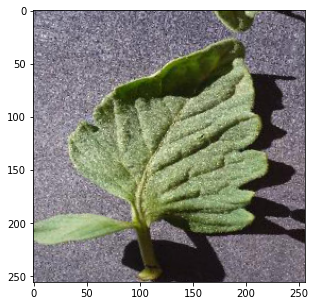

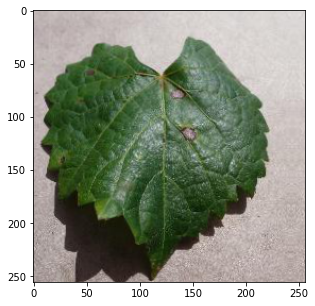

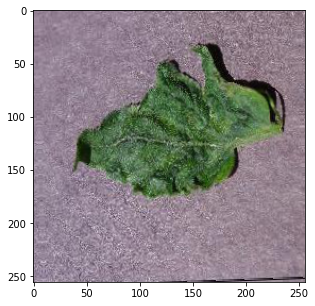

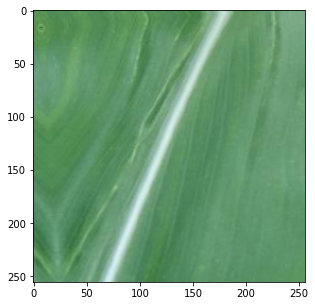

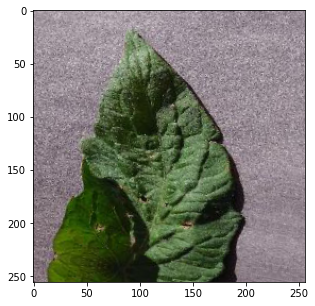

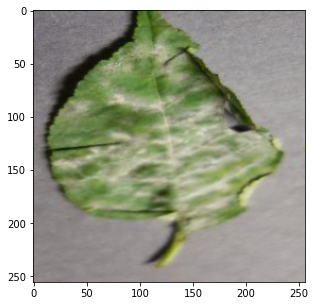

In [ ]:
timg,label=train_data_gen.next()
timg.shape
def plot(img_arr,label):
  for i,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(i)
    plt.show()
plot(timg[:6],label[:6])

In [ ]:
val_image_gen = ImageDataGenerator(rescale = 1./255)

val_data_gen = val_image_gen.flow_from_directory(
        batch_size = BATCH_SIZE,
        directory = VAL_DIR,
        shuffle = True,
        target_size = IMG_SHAPE
    )

Found 17572 images belonging to 38 classes.


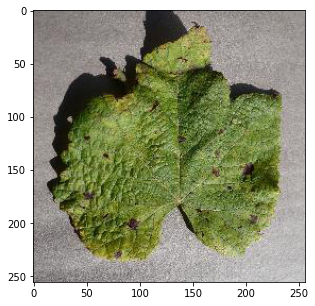

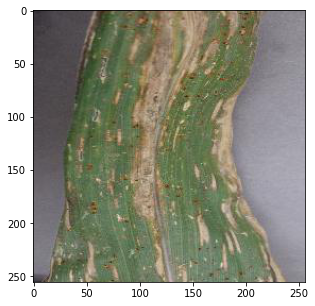

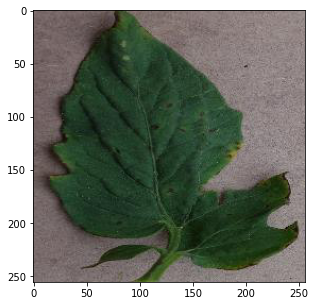

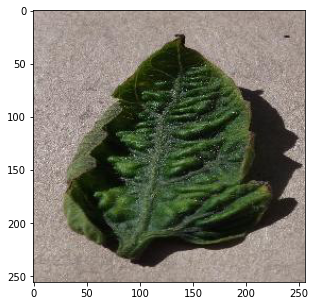

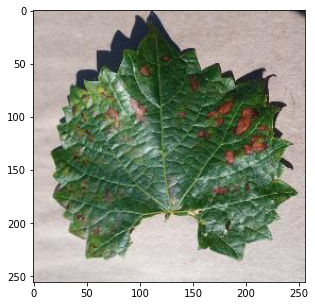

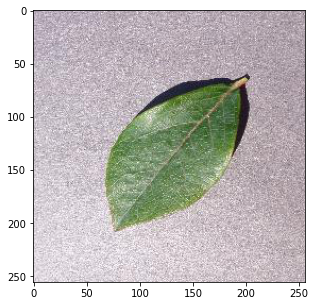

In [ ]:
timg,label=val_data_gen.next()
timg.shape
def plot(img_arr,label):
  for i,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(i)
    plt.show()
plot(timg[:6],label[:6])

In [ ]:
class_name_lookup = {name: index for index, name in train_data_gen.class_indices.items()}

for k, v in class_name_lookup.items():
    print(f"{k:2} : {v}")

 0 : Apple___Apple_scab
 1 : Apple___Black_rot
 2 : Apple___Cedar_apple_rust
 3 : Apple___healthy
 4 : Blueberry___healthy
 5 : Cherry_(including_sour)___Powdery_mildew
 6 : Cherry_(including_sour)___healthy
 7 : Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
 8 : Corn_(maize)___Common_rust_
 9 : Corn_(maize)___Northern_Leaf_Blight
10 : Corn_(maize)___healthy
11 : Grape___Black_rot
12 : Grape___Esca_(Black_Measles)
13 : Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14 : Grape___healthy
15 : Orange___Haunglongbing_(Citrus_greening)
16 : Peach___Bacterial_spot
17 : Peach___healthy
18 : Pepper,_bell___Bacterial_spot
19 : Pepper,_bell___healthy
20 : Potato___Early_blight
21 : Potato___Late_blight
22 : Potato___healthy
23 : Raspberry___healthy
24 : Soybean___healthy
25 : Squash___Powdery_mildew
26 : Strawberry___Leaf_scorch
27 : Strawberry___healthy
28 : Tomato___Bacterial_spot
29 : Tomato___Early_blight
30 : Tomato___Late_blight
31 : Tomato___Leaf_Mold
32 : Tomato___Septoria_leaf_spot
33 

**Preprocessing**

In [ ]:
train_gen = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


**Modelling**

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [ ]:
ep = 7
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/7
2197/2197 [==============================] - 390s 171ms/step - loss: 1.5861 - accuracy: 0.5371 - val_loss: 0.5199 - val_accuracy: 0.8313
Epoch 2/7
2197/2197 [==============================] - 386s 176ms/step - loss: 0.4408 - accuracy: 0.8588 - val_loss: 0.2872 - val_accuracy: 0.9052
Epoch 3/7
2197/2197 [==============================] - 383s 174ms/step - loss: 0.2554 - accuracy: 0.9159 - val_loss: 0.1686 - val_accuracy: 0.9427
Epoch 4/7
2197/2197 [==============================] - 383s 174ms/step - loss: 0.1764 - accuracy: 0.9416 - val_loss: 0.1808 - val_accuracy: 0.9421
Epoch 5/7
2197/2197 [==============================] - 383s 174ms/step - loss: 0.1329 - accuracy: 0.9557 - val_loss: 0.1604 - val_accuracy: 0.9475
Epoch 6/7
2197/2197 [==============================] - 386s 176ms/step - loss: 0.1003 - accuracy: 0.9669 - val_loss: 0.2293 - val_accuracy: 0.9342
Epoch 7/7
2197/2197 [==============================] - 382s 174ms/step - loss: 0.0844 - accuracy: 0.9719 - val_loss: 0

**Plotting**

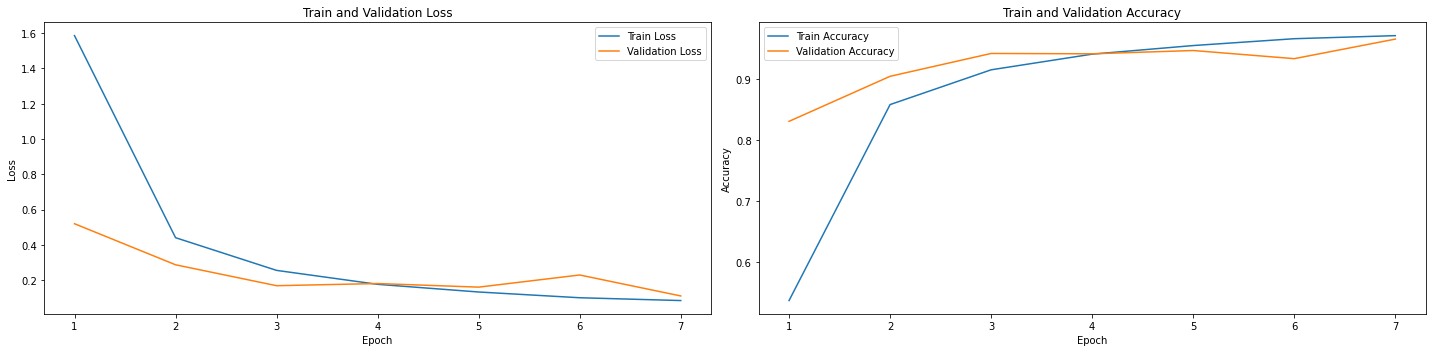

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1,8),history.history['loss'],label="Train Loss")
plt.plot(range(1,8),history.history['val_loss'], label="Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(1,8),history.history['accuracy'], label="Train Accuracy")
plt.plot(range(1,8),history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

**Predicting**

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 97.19 %
Test Accuracy   : 96.63 %
Precision Score : 96.63 %
Recall Score    : 96.63 %


In [ ]:
test_pred = np.argmax(model.predict(test_image_data), axis = 1)
test_pred

array([ 2,  8, 30,  0, 35,  2,  2, 20, 20, 35, 37, 29, 29,  2, 35, 22, 30,
        7, 35, 29, 22, 29, 35, 37, 37, 35,  0, 20, 20,  8, 24, 30,  8])

In [ ]:
import pandas as pd

In [ ]:
test_pred_classes = [class_name_lookup[i] for i in test_pred]

pd.DataFrame({
    "Filename": test_image_filenames,
    "Predicted classes": test_pred_classes
    })

,Filename,Predicted classes
0,AppleCedarRust3.JPG,Apple___Cedar_apple_rust
1,CornCommonRust3.JPG,Corn_(maize)___Common_rust_
2,TomatoEarlyBlight1.JPG,Tomato___Late_blight
3,AppleScab1.JPG,Apple___Apple_scab
4,TomatoYellowCurlVirus3.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus
5,AppleCedarRust1.JPG,Apple___Cedar_apple_rust
6,AppleCedarRust4.JPG,Apple___Cedar_apple_rust
7,PotatoEarlyBlight1.JPG,Potato___Early_blight
8,PotatoEarlyBlight4.JPG,Potato___Early_blight
9,TomatoYellowCurlVirus5.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus


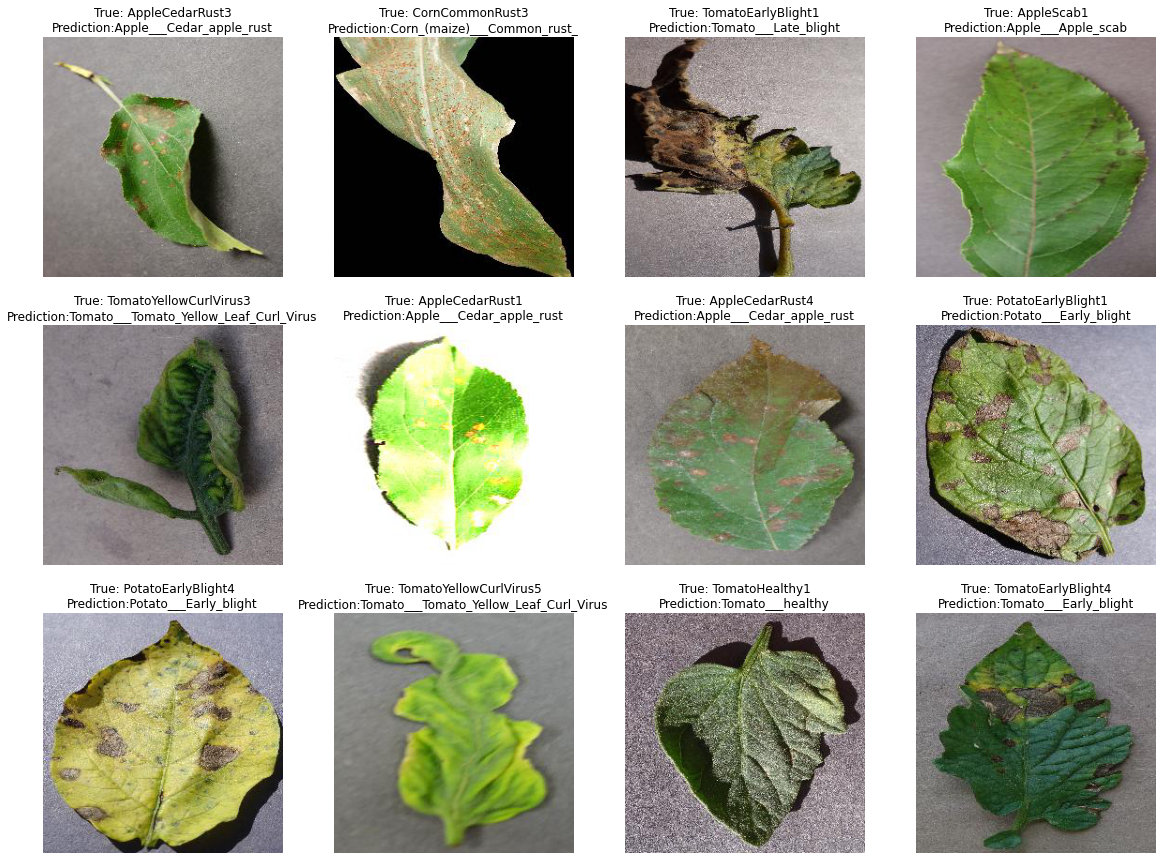

In [ ]:
plt.subplots(nrows = 3, ncols = 4, figsize = (20, 15))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis(False)
    plt.grid(False)
    plt.imshow(test_image_data[i])
    plt.title(f"True: {test_image_filenames[i][:-4]}\nPrediction:{test_pred_classes[i]}")

plt.show()

In [ ]:
from keras.models import load_model
model.save("plant.h5")